In [76]:
import numpy as np
import os
import cv2
import shutil
import random as rn
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [77]:
data_dir ="flowers"

In [78]:
print(os.listdir("flowers"))

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [79]:
batch_size = 32
img_height = 180
img_width = 180

In [80]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3620 files belonging to 5 classes.
Using 2896 files for training.


In [81]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3620 files belonging to 5 classes.
Using 724 files for validation.


In [82]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


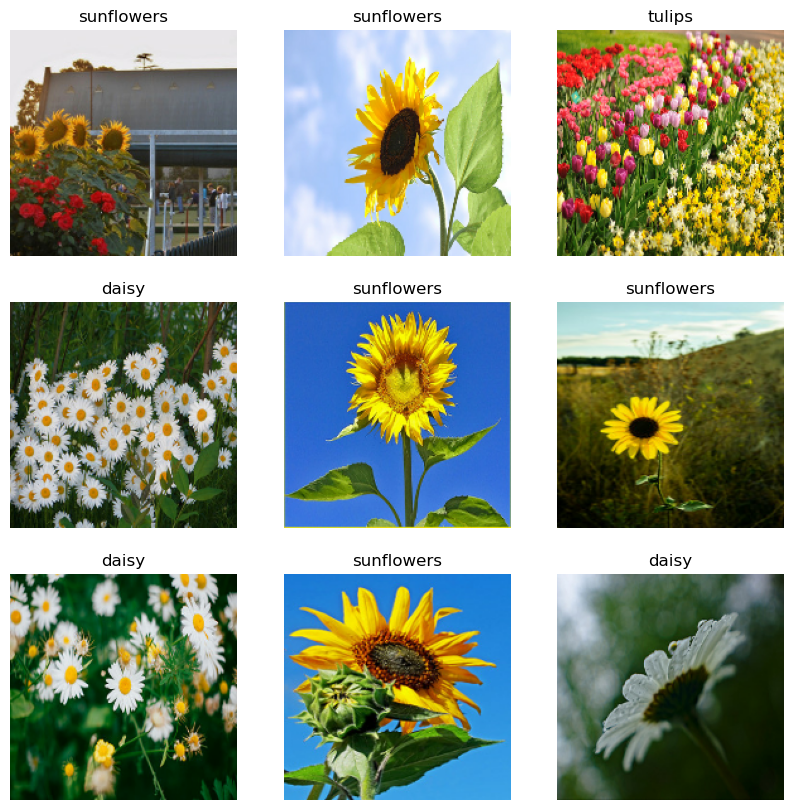

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [84]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [85]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [86]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [87]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [88]:
num_classes = 5
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [89]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [90]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
91/91 [==============================] - 509s 5s/step - loss: 1.3148 - accuracy: 0.4171 - val_loss: 1.0457 - val_accuracy: 0.5829
Epoch 2/10
91/91 [==============================] - 510s 6s/step - loss: 1.0441 - accuracy: 0.5836 - val_loss: 0.9930 - val_accuracy: 0.5925
Epoch 3/10
91/91 [==============================] - 525s 6s/step - loss: 0.8881 - accuracy: 0.6512 - val_loss: 0.9879 - val_accuracy: 0.5994
Epoch 4/10
91/91 [==============================] - 524s 6s/step - loss: 0.7963 - accuracy: 0.6920 - val_loss: 0.9604 - val_accuracy: 0.6436
Epoch 5/10
91/91 [==============================] - 511s 6s/step - loss: 0.6623 - accuracy: 0.7507 - val_loss: 0.9436 - val_accuracy: 0.6533
Epoch 6/10
91/91 [==============================] - 498s 5s/step - loss: 0.4909 - accuracy: 0.8080 - val_loss: 1.0487 - val_accuracy: 0.6575
Epoch 7/10
91/91 [==============================] - 519s 6s/step - loss: 0.3671 - accuracy: 0.8657 - val_loss: 1.1350 - val_accuracy: 0.6409
Epoch 8/10
91

In [101]:
import cv2

img_height = 180
img_width = 180  

# Check the path to the image and ensure it's valid
image_path = (r'C:\Users\Gbest\Desktop\Deep Learning\flowers_classification\flowers\test\sunflowers\20972866151_e6a928b00a.jpg')


test_img = cv2.imread(image_path)

if test_img is not None:
    test_input = cv2.resize(test_img, (img_height, img_width))
    test_input = test_input.reshape((1, img_height, img_width, 3))
    
    # Make a prediction
    result = model.predict(test_input)
    
    # Define a mapping from class indices to class names
    class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
    
    # Find the index with the highest probability
    predicted_class_index = result.argmax()
    
    # Get the corresponding class name
    predicted_class_name = class_names[predicted_class_index]
    
    print(f"The predicted flower is: {predicted_class_name}")
else:
    print("Image could not be loaded.")

1/1 [==============================] - 9s 9s/step
The predicted flower is: tulips


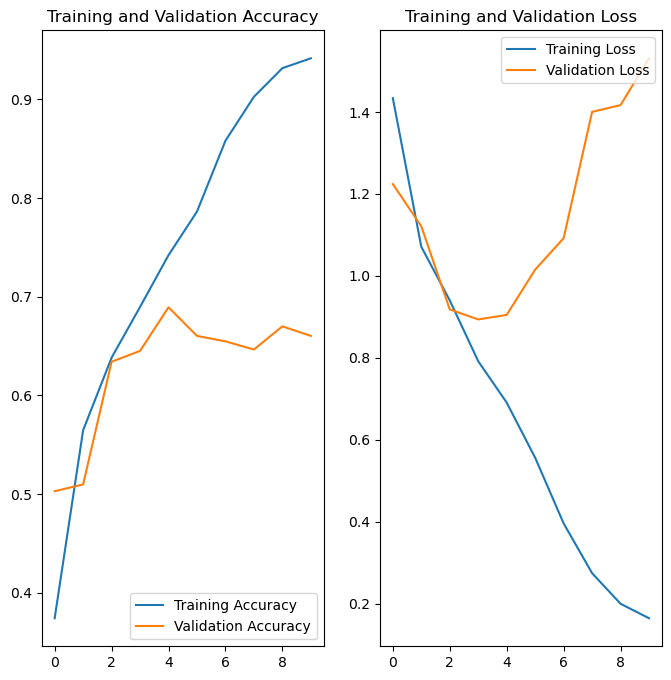

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

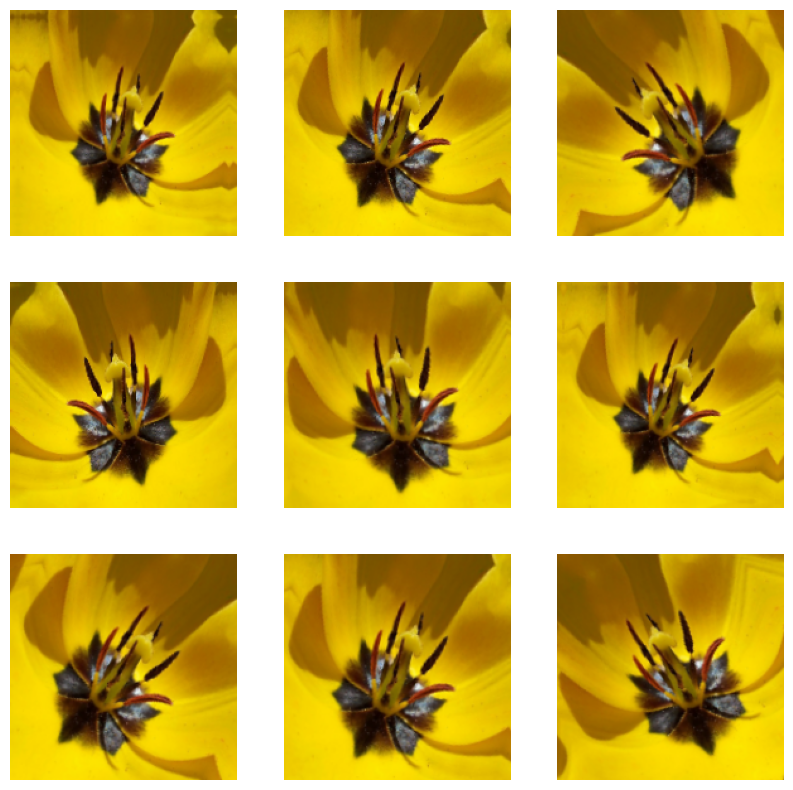

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [97]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [98]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 180, 180, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 90, 90, 32)       

In [99]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [100]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
91/91 [==============================] - 970s 10s/step - loss: 2.1580 - accuracy: 0.4527 - val_loss: 12.7679 - val_accuracy: 0.2127
Epoch 2/20
91/91 [==============================] - 1452s 16s/step - loss: 1.0693 - accuracy: 0.5777 - val_loss: 10.3079 - val_accuracy: 0.2486
Epoch 3/20
91/91 [==============================] - 1519s 17s/step - loss: 0.9902 - accuracy: 0.6084 - val_loss: 4.6482 - val_accuracy: 0.3702
Epoch 4/20
91/91 [==============================] - 759s 8s/step - loss: 0.9258 - accuracy: 0.6367 - val_loss: 2.4641 - val_accuracy: 0.3785
Epoch 5/20
91/91 [==============================] - 713s 8s/step - loss: 0.8672 - accuracy: 0.6699 - val_loss: 1.1642 - val_accuracy: 0.5801
Epoch 6/20
91/91 [==============================] - 704s 8s/step - loss: 0.8107 - accuracy: 0.6878 - val_loss: 0.9741 - val_accuracy: 0.6630
Epoch 7/20
91/91 [==============================] - 698s 8s/step - loss: 0.7952 - accuracy: 0.7068 - val_loss: 0.9221 - val_accuracy: 0.6354
Epoch 

In [35]:
model.save("flowers_class_model.h5")

C:\Users\Gbest\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


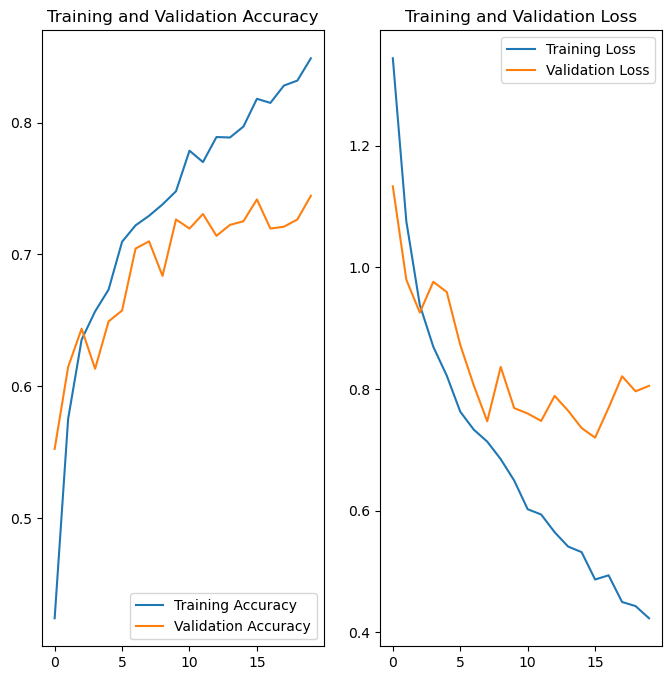

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [75]:
import cv2

img_height = 180
img_width = 180  

# Check the path to the image and ensure it's valid
image_path = (r'C:\Users\Gbest\Desktop\Deep Learning\flowers_classification\flowers\test\daisy\134409839_71069a95d1_m.jpg')


test_img = cv2.imread(image_path)

if test_img is not None:
    test_input = cv2.resize(test_img, (img_height, img_width))
    test_input = test_input.reshape((1, img_height, img_width, 3))
    
    # Make a prediction
    result = model.predict(test_input)
    
    # Define a mapping from class indices to class names
    class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
    
    # Find the index with the highest probability
    predicted_class_index = result.argmax()
    
    # Get the corresponding class name
    predicted_class_name = class_names[predicted_class_index]
    
    print(f"The predicted flower is: {predicted_class_name}")
else:
    print("Image could not be loaded.")

1/1 [==============================] - 0s 108ms/step
The predicted flower is: daisy
